<font size=48>Machine Learning</font><br>

## Lab05 - Dimension Reduction Using Principal Component Analysis (PCA)

Objectives:
- Learn how to use the scikit-learn's PCA package.
- Apply PCA using two popular datasets: Breast Cancer dataset and CIFAR-10.

Material adapted from https://www.datacamp.com/tutorial/principal-component-analysis-in-python but I added and modifed quite a bit to it.

Version: 2024-11-30

This lab is by YP Wong [<yp@ypwong.net>](mailto:yp@ypwong.net).


## What is Principal Component Analysis (PCA)

- It is **linear dimensionality reduction** technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space.
- It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an **Unsupervised** dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels), and you will learn how to achieve this practically using Python in later sections of this tutorial!

**Note**: Features, Dimensions, and Variables are all referring to the same thing. You will find them being used interchangeably.

### Where can you apply PCA?

- **Data Visualization**: Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible. Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

- **Speeding Machine Learning (ML) Algorithm**: Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.

At an abstract level,  you take a dataset having many features, and you simplify that dataset by selecting a few ``Principal Components`` from original features.

### What is a Principal Component?

Principal components are the key to PCA; they represent what's underneath the hood of your data. In a layman term, when the data is projected into a lower dimension (assume three dimensions) from a higher space, the three dimensions are nothing but the three Principal Components that captures (or holds) most of the variance (information) of your data.

Principal components have both direction and magnitude. The direction represents across which *principal axes* the data is mostly spread out or has most variance and the magnitude signifies the amount of variance that Principal Component captures of the data when projected onto that axis. The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent principal component is orthogonal to the last and has a lesser variance. In this way, given a set of <i>x</i> correlated variables over <i>y</i> samples you achieve a set of <i>u</i> uncorrelated principal components over the same <i>y</i> samples.

The reason you achieve uncorrelated principal components from the original features is that the correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated principal components; each representing a different set of correlated features with different amounts of variation.

Each principal component represents a percentage of total variation captured from the data.

In this lab, we will apply PCA on the two use-cases:
- ``Data Visualization``
- ``Speeding ML algorithm``

To accomplish the above two tasks, you will use two famous Breast Cancer (numerical) and CIFAR - 10 (image) dataset.


## Understanding the Data

### Breast Cancer

The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies whether a patient has breast cancer or not. The two categories are: malignant and benign.

The malignant class has 212 samples, whereas the benign class has 357 samples.

It has 30 features shared across all classes: radius, texture, perimeter, area, smoothness, fractal dimension, etc.

You can download the breast cancer dataset from <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">here</a>, or rather an easy way is by loading it with the help of the ``sklearn`` library.

### CIFAR-10

The CIFAR-10 (Canadian Institute For Advanced Research) dataset consists of 60000 images each of 32x32x3 color images having ten classes, with 6000 images per category.

The dataset consists of 50000 training images and 10000 test images.

The classes in the dataset are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck.

You can download the CIFAR dataset from <a href="https://www.cs.toronto.edu/~kriz/cifar.html">here</a>, or you can also load it on the fly with the help of a deep learning library like ``Keras``.


## Mount Google Drive

In [35]:
# Uncomment the below if you need to read data from your Google Drive
# Change the notebook_path to where you run the Jupyter Notebook from.

# from google.colab import drive
# import os

# drive.mount('/content/drive')

In [36]:
# notebook_path = r"/content/drive/MyDrive/Classroom/_ML2425T3(2430)/__ML2425T3(2430)_SHARED__/Labs/Lab05_PCA"
# os.chdir(notebook_path)
# !pwd

## Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration - Breast Cancer Dataset

In [38]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

cancer_data          = dataset.data
cancer_labels        = dataset.target
cancer_feature_names = dataset.feature_names

# We will not use the labels since we are doing unsupervised learning
#   nevertheless, this is just for us to explore the data
print(type(cancer_data))
print(type(cancer_labels))
print(type(cancer_feature_names))

print(cancer_data.shape)
print(cancer_labels.shape)
print(cancer_feature_names.shape)

print(cancer_data)
print(cancer_labels)
print(cancer_feature_names)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(569, 30)
(569,)
(30,)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 

In [39]:
cancer_labels = cancer_labels.reshape( (569, 1) )  # flatten the matrix into a vector

cancer_df = pd.DataFrame(np.concatenate( [cancer_data, cancer_labels], axis = 1 ) )

cancer_df.columns = np.append(cancer_feature_names, 'label')

# cancer_df["label"].replace(0, "Benign",    inplace = True)   # will not work in future pandas 3.0
# cancer_df["label"].replace(1, "Malignant", inplace = True)   # will not work in future pandas 3.0
cancer_df["label"] = cancer_df["label"].replace(0, "Benign")
cancer_df["label"] = cancer_df["label"].replace(1, "Malignant")

In [40]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [41]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


## Data Visualization using PCA - Breast Cancer Dataset

### Preprocessing - Data Normalization

In [42]:
from sklearn.preprocessing import StandardScaler

X = cancer_df.loc[:, cancer_feature_names].values
X = StandardScaler().fit_transform(X) # normalizing the features

print(X.shape)

print("np.mean(X) =", np.mean(X))
print("np.std(X) =", np.std(X))

feature_columns = ['feature' + str(i) for i in range(X.shape[1])]

X_normalized = pd.DataFrame(X, columns = feature_columns)

(569, 30)
np.mean(X) = -6.826538293184326e-17
np.std(X) = 1.0


In [43]:
X_normalized.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [44]:
from sklearn.decomposition import PCA

cancer_pca = PCA(n_components = 2)
cancer_principal_components = cancer_pca.fit_transform(X)

cancer_pca_df = pd.DataFrame(data = cancer_principal_components,
                             columns = ["principal component 1", "principal component 2"])

print('Explained variation per principal component: {}'.format(cancer_pca.explained_variance_ratio_))

cancer_pca_df.tail()

Explained variation per principal component: [0.44272026 0.18971182]


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


<Figure size 640x480 with 0 Axes>

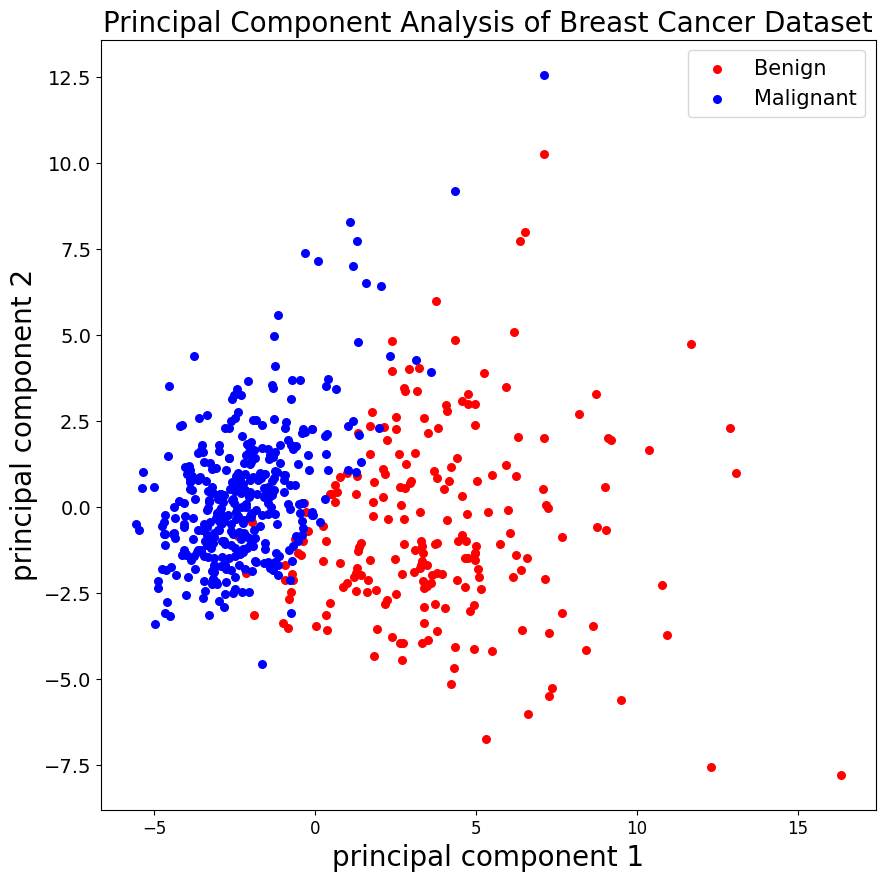

In [45]:
plt.figure()
plt.figure(figsize = (10,10))

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel("principal component 1",fontsize = 20)
plt.ylabel("principal component 2",fontsize = 20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize = 20)

targets = ['Benign', 'Malignant']
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = cancer_df["label"] == target
    plt.scatter(cancer_pca_df.loc[indices_to_keep, 'principal component 1'],
                cancer_pca_df.loc[indices_to_keep, 'principal component 2'],
                c = color, s = 30)

plt.legend(targets,prop = {'size': 15});

## Data Exploration - CIFAR-10

Reference: https://www.cs.toronto.edu/~kriz/cifar.html

In [46]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

# Note: We are taking only a small subset of the data
(X_train, y_train), (X_test, y_test) = (X_train[:800], y_train[:800]),  \
                                       (X_test[:200],  y_test[:200])

print()
print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (50000, 32, 32, 3)
X_test.shape = (10000, 32, 32, 3)
y_train.shape = (50000, 1)
y_test.shape = (10000, 1)

X_train.shape = (800, 32, 32, 3)
X_test.shape = (200, 32, 32, 3)
y_train.shape = (800, 1)
y_test.shape = (200, 1)


Let's also find out the total number of labels and the various kinds of classes the data has.


In [47]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
n_classes = len(classes)

print('Total number of outputs : ', n_classes)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [48]:
label_dict = {
              0: 'airplane', 1: 'automobile', 2: 'bird',  3: 'cat',  4: 'deer',
              5: 'dog',      6: 'frog',       7: 'horse', 8: 'ship', 9: 'truck'
             }

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


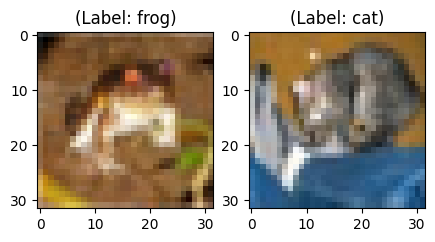

In [49]:
plt.figure(figsize = [5, 5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[0], (32, 32, 3))
plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[0],(32, 32, 3))
plt.imshow(curr_img)

print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

## Data Visualization using PCA - CIFAR-10


In [50]:
print("np.min(X_train) =", np.min(X_train))
print("np.max(X_train) =", np.max(X_train))

print("np.min(X_test) =", np.min(X_test))
print("np.max(X_test) =", np.max(X_test))

np.min(X_train) = 0
np.max(X_train) = 255
np.min(X_test) = 0
np.max(X_test) = 255


In [51]:
X_train = X_train / np.max(X_train)
X_test  = X_test  / np.max(X_test)

print("np.min(X_train) =", np.min(X_train))
print("np.max(X_train) =", np.max(X_train))

print("np.min(X_test) =", np.min(X_test))
print("np.max(X_test) =", np.max(X_test))

np.min(X_train) = 0.0
np.max(X_train) = 1.0
np.min(X_test) = 0.0
np.max(X_test) = 1.0


In [52]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened  = X_test.reshape(X_test.shape[0], -1)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(800, 3072)
(200, 3072)


In [53]:
feature_columns = ['pixel' + str(i) for i in range(X_train_flattened.shape[1])]

cifar_df = pd.DataFrame(X_train_flattened, columns = feature_columns)

cifar_df["label"] = y_train

print(cifar_df.shape)

(800, 3073)


In [54]:
cifar_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [55]:
cifar_pca = PCA(n_components = 2)

cifar_principal_components = cifar_pca.fit_transform(cifar_df.iloc[:1000,:-1])

cifar_pca_df = pd.DataFrame(data = cifar_principal_components,
                            columns = ["principal component 1", "principal component 2"])

cifar_pca_df['y'] = y_train

print('Explained variation per principal component: {}'.format(cifar_pca.explained_variance_ratio_))

cifar_pca_df.head()

Explained variation per principal component: [0.28986339 0.11142274]


,principal component 1,principal component 2,y
0,-6.647671,1.990157,6
1,0.891439,-1.805314,9
2,8.013133,-10.264463,9
3,-10.416198,-0.580872,4
4,-2.317651,-4.752451,1


Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from 3072 dimensions to a mere two principal components.

Its time to visualize the CIFAR-10 data in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

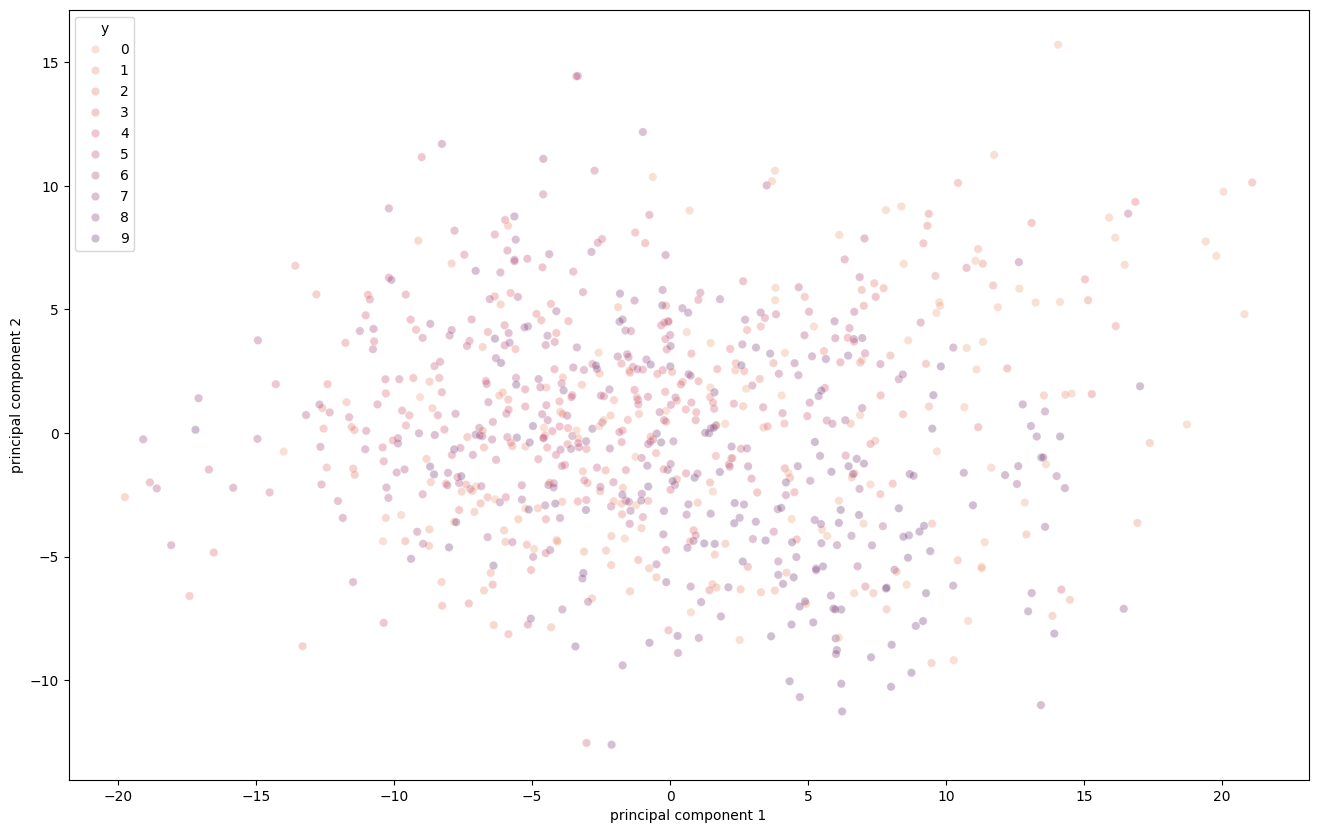

In [56]:
import seaborn as sns

plt.figure(figsize = (16, 10))

sns.scatterplot(
    x = "principal component 1",
    y = "principal component 2",
    hue = "y",
    palette = sns.color_palette("flare", 10),
    data = cifar_pca_df,
    legend = "full",
    alpha = 0.3
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.

## Deep Learning Training with CIFAR-10 Dataset

In [57]:
def create_model(input_size, num_classes):
  model = Sequential()
  model.add(Dense(1024, activation = 'relu',
                  input_shape = (input_size,)))
  model.add(Dense(1024, activation = 'relu'))
  model.add(Dense( 512, activation = 'relu'))
  model.add(Dense( 256, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  return model

In [58]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

train_size = 800   # maximum is 50000
test_size = 200    # maximum is 10000

(X_train, y_train), (X_test, y_test) = (X_train[:train_size], y_train[:train_size]),  \
                                       (X_test[:test_size],  y_test[:test_size])

print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (800, 32, 32, 3)
X_test.shape = (200, 32, 32, 3)
y_train.shape = (800, 1)
y_test.shape = (200, 1)


In [59]:
# Normalized data
X_train = X_train / np.max(X_train)
X_test  = X_test  / np.max(X_test)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened  = X_test.reshape(X_test.shape[0], -1)

print(X_train_flattened.shape)
print(X_test_flattened.shape)

(800, 3072)
(200, 3072)


In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

y_train.shape = (800, 10)
y_test.shape = (200, 10)


### With PCA


In [61]:
cifar_pca = PCA(0.9)  # how much variance we would like PCA to capture and hence,
                      #    the n_components will vary based on the variance parameter.

cifar_pca.fit(X_train_flattened)

print("n_components_ =", cifar_pca.n_components_)

print('Explained variation per principal component: {}'.format(cifar_pca.explained_variance_ratio_))

n_components_ = 83
Explained variation per principal component: [0.28986339 0.11142274 0.06320023 0.03834746 0.03588732 0.02732871
 0.02671904 0.02493325 0.02029883 0.01468537 0.01357821 0.01137287
 0.01039815 0.00970824 0.00927267 0.00884102 0.00827935 0.00762178
 0.00708355 0.00704695 0.00634673 0.0056454  0.00537674 0.00513374
 0.00492868 0.00488338 0.00481173 0.00452808 0.00438855 0.00427008
 0.00400966 0.00385831 0.00352653 0.00343986 0.00327039 0.0032342
 0.00307641 0.00298467 0.0029003  0.00271437 0.00269634 0.0026168
 0.00255533 0.0023753  0.00234089 0.00226002 0.00218797 0.00216224
 0.00209488 0.0020478  0.00199967 0.00196804 0.00192962 0.00188816
 0.00185849 0.00178862 0.00175458 0.00173098 0.00170683 0.0016839
 0.00162746 0.00160599 0.00152762 0.00151717 0.00150819 0.00144018
 0.00141101 0.00136886 0.00135852 0.0013414  0.00131443 0.00129829
 0.00125529 0.00123154 0.00119239 0.00117725 0.00114056 0.00112007
 0.00110972 0.00109095 0.00107779 0.00106285 0.00103189]


In [62]:
# Transform image into principal components
X_train_pcs = cifar_pca.transform(X_train_flattened)
X_test_pcs = cifar_pca.transform(X_test_flattened)

In [63]:
num_classes = 10
model = create_model(cifar_pca.n_components_, num_classes)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 1024)                │          86,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,794,314 (6.84 MB)

 Trainable params: 1,794,314 (6.84 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "rmsprop",
              metrics = ['accuracy'])

batch_size = 128
epochs = 10

history = model.fit(X_train_pcs,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test_pcs, y_test)
                    )

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.1386 - loss: 2.3768 - val_accuracy: 0.1900 - val_loss: 2.1449
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2816 - loss: 1.9653 - val_accuracy: 0.1950 - val_loss: 2.1959
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3656 - loss: 1.8228 - val_accuracy: 0.3050 - val_loss: 2.1707
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4304 - loss: 1.6640 - val_accuracy: 0.2500 - val_loss: 2.1509
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5263 - loss: 1.4273 - val_accuracy: 0.2950 - val_loss: 2.3180
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5842 - loss: 1.2856 - val_accuracy: 0.2650 - val_loss: 2.3238
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6175 - loss: 1.0823 - val_accuracy: 0.2850 - val_loss: 2.7546
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.6442 - loss: 1.0506 - val_accuracy: 0.2550 - val_loss: 2.4426


### Without PCA

In [65]:
num_classes = 10
model = create_model(X_train_flattened.shape[1], num_classes)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,855,050 (18.52 MB)

 Trainable params: 4,855,050 (18.52 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "rmsprop",
              metrics = ['accuracy']
              )

batch_size = 128
epochs = 10

history = model.fit(X_train_flattened,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test_flattened, y_test)
                    )

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.1070 - loss: 5.5144 - val_accuracy: 0.0700 - val_loss: 2.6802
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.1237 - loss: 2.4070 - val_accuracy: 0.1250 - val_loss: 2.3212
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1530 - loss: 2.2923 - val_accuracy: 0.0850 - val_loss: 2.2851
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.1193 - loss: 2.2632 - val_accuracy: 0.1600 - val_loss: 2.2480
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.1630 - loss: 2.3023 - val_accuracy: 0.1800 - val_loss: 2.3157
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.1715 - loss: 2.2658 - val_accuracy: 0.1600 - val_loss: 2.1905
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.1060 - loss: 2.2493 - val_accuracy: 0.1050 - val_loss: 2.2997
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.1533 - loss: 2.1971 - val_accuracy: 0.2100 - val_loss:

### TO DO

1. Use 3D scatterplot to plot the first 3 principle components of the CIFAR-10 dataset.

2. Try different batch size, epoch, size of training and testing input data.

3. Use appropriate plots to compare the results, performance, speed etc of the deep learning models with and without PCA



## END.